<a href="https://colab.research.google.com/github/sakaratsooksang/arphohub/blob/main/undronned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Find an area that haven't surveyed** <br> **and Find the nearest station**
**Author** : Sakarat Sooksang <br>
**My GitHub** : <a href=https://github.com/sakaratsooksang/Train_proj>GitHub repository</a><br>
Clone : https://github.com/sakaratsooksang/Train_proj.git

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%mkdir '/content/drive/MyDrive/Data'
%cd '/content/drive/MyDrive/Data'

/content/drive/MyDrive/Data


In [7]:
! pip install geopandas
! pip install pyproj
! pip install geographiclib

     |████████████████████████████████| 1.0MB 7.8MB/s 
     |████████████████████████████████| 6.6MB 16.6MB/s 
     |████████████████████████████████| 15.4MB 184kB/s 


In [10]:
! git clone https://github.com/sakaratsooksang/Train_proj.git

Cloning into 'Train_proj'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [13]:
%cd '/content/drive/MyDrive/Data/Train_proj'

/content/drive/MyDrive/Data/Train_proj


In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [18]:
cl = gpd.read_file('T101_centerline.gpkg')

In [19]:
cl

,segment_id,name,km_start,km_end,length,geohash,geometry
0,1,ดอนเมือง - ชุมทางบ้านภาชี,21500.0,89950.0,68450.0,w4x8bv6mkp,"LINESTRING (673020.634 1539503.403, 673719.056..."
1,2,ชุมทางบ้านภาชี - นครสวรรค์,89950.0,245780.0,155830.0,w4xmyf5947,"LINESTRING (685486.208 1598254.957, 685486.208..."
2,3,นครสวรรค์ - เด่นชัย,245780.0,533947.2,288167.2,w4zr9wgkuk,"LINESTRING (624167.935 1732014.901, 624141.840..."
3,4,เด่นชัย - เชียงใหม่,533947.2,751620.0,217672.8,w5nxzxdhgh,"LINESTRING (610774.115 1988338.740, 610527.609..."


In [ ]:
sta = gpd.read_file('T102_station.gpkg')

In [ ]:
sta

,id,rrrouteid,nameth,nameen,stationID,class,dist,geometry
0,243,NE,ที่หยุดรถตลาดหนองคาย,Talat Nong Khai,w71j9wdr7w,4,0.000,POINT (894878.197 1980719.944)
1,1,C,สถานีรถกรุงเทพ,BANGKOK RAILWAY STATION (HUA LAMPHONG RAILWAY ...,w4rqpm4hth,พิเศษ,0.000,POINT (664009.887 1519399.109)
2,76,MK,สถานีบ้านแหลม,BAN LAEM RAILWAY STATION,w4rm19nr07,3,0.180,POINT (637406.744 1497416.940)
3,405,S,สถานีธนบุรี,THON BURI RAILWAY STATION,w4rqq3n3ny,1,0.866,POINT (659881.414 1521739.002)
4,77,MK,ที่หยุดรถท่าฉลอม,THA CHALOM UNMANNED STATION,w4rkcxu5mr,4,1.050,POINT (637100.568 1496586.694)
...,...,...,...,...,...,...,...,...
678,679,S,สถานีสุไหงปาดี,SU-NGAI PADI RAILWAY STATION,w306w7gq6v,1,1130.100,POINT (818899.270 673578.595)
679,680,S,ที่หยุดรถโคกสยา,KHOK SAYA UNMANNED STATION,w306r4mprq,4,1137.140,POINT (822868.846 667843.387)
680,681,S,สถานีสุไหงโกลก,SU-NGAI KOLOK RAILWAY STATION,w30d21p83g,1,1142.990,POINT (828098.151 666977.065)
681,682,S,ที่หยุดรถคลองยา,KHLONG YA UNMANNED STATION,w1wdg8uytn,4,4246.000,POINT (533110.433 986703.230)


In [ ]:
bkk_phase = gpd.read_file('01_bkk_phase.shp')
bkk_phase.to_crs('EPSG:32647')
srt = gpd.read_file('01_SRT_OT_BKK_BPJ.shp')
srt.to_crs('EPSG:32647')
ecw_km = gpd.read_file('02_ECW_KM.shp')
ecw_km.to_crs('EPSG:32647')
print(ecw_km.crs)
ecw_sta = gpd.read_file('02_ECW_station.shp')
ecw_sta.to_crs('EPSG:32647')

epsg:32647


,location,geometry
0,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((548658.334 2022162.920, 550109.278 2..."
1,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((595545.286 1917032.773, 596193.066 1..."
2,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((521384.142 2046521.955, 521946.499 2..."
3,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((549264.693 2021667.778, 550497.141 2..."
4,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((591401.892 2001360.108, 592001.000 2..."
5,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((665270.692 1663603.145, 665847.245 1..."
6,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((590413.183 2023651.573, 591006.470 2..."
7,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((534115.602 2031361.678, 534808.567 2..."
8,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((504202.255 2060991.133, 504639.294 2..."
9,E:\train\data_ortho\02_Ortho_NorthernThailand\...,"POLYGON ((607975.227 1919334.358, 608614.185 1..."


In [ ]:
a1 = gpd.overlay(cl,bkk_phase,how='difference')
a2 = gpd.overlay(a1,srt,how='difference')
a3 = gpd.overlay(a2,ecw_km,how='difference')
undronned_area = gpd.overlay(a3,ecw_sta,how='difference')

<AxesSubplot:>

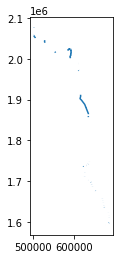

In [ ]:
undronned_area.plot()

In [ ]:
undronned_area

,segment_id,name,km_start,km_end,length,geohash,geometry
0,1,ดอนเมือง - ชุมทางบ้านภาชี,21500.0,89950.0,68450.0,w4x8bv6mkp,"MULTILINESTRING ((677040.894 1593296.592, 6770..."
1,2,ชุมทางบ้านภาชี - นครสวรรค์,89950.0,245780.0,155830.0,w4xmyf5947,"MULTILINESTRING ((685486.208 1598254.957, 6854..."
2,3,นครสวรรค์ - เด่นชัย,245780.0,533947.2,288167.2,w4zr9wgkuk,"MULTILINESTRING ((623307.161 1735520.560, 6232..."
3,4,เด่นชัย - เชียงใหม่,533947.2,751620.0,217672.8,w5nxzxdhgh,"MULTILINESTRING ((610774.115 1988338.740, 6107..."


In [ ]:
row = []
for i in range(len(undronned_area)):
     for line in undronned_area['geometry'][i]:
          data = [
               i+1,
               undronned_area['name'][i],
               line.length,
               line
          ]
          row.append(data)
cols = ['segment_id','name','lenght (m)','geometry']
gdf = gpd.GeoDataFrame(row,columns=cols)


<AxesSubplot:>

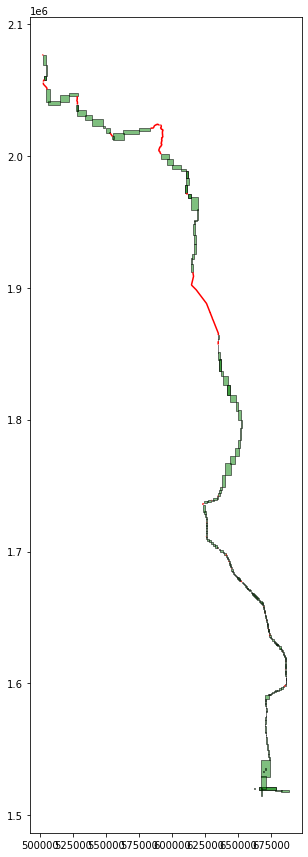

In [ ]:
ax = gdf.plot(color='red',figsize=(15,15))
srt.plot(ax=ax, facecolor='green', edgecolor='k',alpha=0.5)
bkk_phase.plot(ax=ax, facecolor='green', edgecolor='k',alpha=0.5)
ecw_km.plot(ax=ax, facecolor='green', edgecolor='k',alpha=0.5)

In [ ]:
gdf.to_file("undronned_line.gpkg", layer='undronned_line', driver="GPKG")

In [ ]:
gdf.head(3)

,segment_id,name,lenght (m),geometry
0,1,ดอนเมือง - ชุมทางบ้านภาชี,5.111999,"LINESTRING (677040.894 1593296.592, 677045.463..."
1,1,ดอนเมือง - ชุมทางบ้านภาชี,641.775623,"LINESTRING (684942.052 1597914.708, 685486.208..."
2,2,ชุมทางบ้านภาชี - นครสวรรค์,426.259794,"LINESTRING (685486.208 1598254.957, 685486.208..."


In [ ]:
sta.head(3)

,id,rrrouteid,nameth,nameen,stationID,class,dist,geometry
0,243,NE,ที่หยุดรถตลาดหนองคาย,Talat Nong Khai,w71j9wdr7w,4,0.00,POINT (894878.197 1980719.944)
1,1,C,สถานีรถกรุงเทพ,BANGKOK RAILWAY STATION (HUA LAMPHONG RAILWAY ...,w4rqpm4hth,พิเศษ,0.00,POINT (664009.887 1519399.109)
2,76,MK,สถานีบ้านแหลม,BAN LAEM RAILWAY STATION,w4rm19nr07,3,0.18,POINT (637406.744 1497416.940)


In [ ]:
def nearest_sta(cl_df,sta_df):
    for i in range(cl_df):
        first_point,last_point = cl_df['geometry'].boundary[i]
        
    #first_point,last_point = cl_df['geometry'].boundary[i]
    dist = sta_df['centroid'].distance(first_point)
    return print(dist)

In [ ]:
nearest_station = []
azimuth = []
direction = []

In [ ]:
from pyproj import Proj
from geographiclib.geodesic import Geodesic

In [ ]:
def utm2lla(x,y):    
    myProj = Proj("+proj=utm +zone=47N, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
    lon, lat = myProj(x,y, inverse=True)
    return lon,lat

# ทำการหา สถานีที่ใกล้ที่สุดที่ใกล้เคียงกับจุดต้น หรือ ปลายของเส้น
และทำการหา Azimuth เพื่อจะทำการบอกว่าสถานีอยู่ทางซ้ายหรือขวา

In [ ]:
for i in range(len(gdf)):
    first,last=gdf['geometry'].boundary[i]
    distFirst = sta['geometry'].distance(first)
    sta['distFirst'] = distFirst
    distLast = sta['geometry'].distance(last)
    sta['distLast'] = distLast
    x=np.array(sta['geometry'][0].xy[0])[0]
    y=np.array(sta['geometry'][0].xy[1])[0]
    minFirst = min(distFirst)
    minLast = min(distLast)
    if minFirst < minLast :
        StaPoint = (sta[sta['distFirst']==minFirst])['geometry'].values[0]
        xSTA = np.array(StaPoint.xy[0][0])
        ySTA = np.array(StaPoint.xy[1][0])
        xCL = np.array(first.xy[0][0])
        yCL = np.array(first.xy[1][0])
        lonSTA ,latSTA = utm2lla(xSTA,ySTA)
        lonCL ,latCL = utm2lla(xCL,yCL)
        geod = Geodesic.WGS84.Inverse(latCL, lonCL, latSTA, lonSTA)
        azi = geod['azi1']
        if azi < 0 :
            azi +=360
        azimuth.append(azi)
        if azi <180:
            direction.append('Right Side from Cl')
        else:
            direction.append('Left Side from CL')
        nearest_station.append((sta[sta['distFirst']==minFirst])['nameth'].values[0])
    else :
        nearest_station.append((sta[sta['distLast']==minLast])['nameth'].values[0])
        xSTA = np.array(StaPoint.xy[0][0])
        ySTA = np.array(StaPoint.xy[1][0])
        xCL = np.array(last.xy[0][0])
        yCL = np.array(last.xy[1][0])
        lonSTA ,latSTA = utm2lla(xSTA,ySTA)
        lonCL ,latCL = utm2lla(xCL,yCL)
        geod = Geodesic.WGS84.Inverse(latCL, lonCL, latSTA, lonSTA)
        azi = geod['azi1']
        if azi < 0 :
            azi +=360
        azimuth.append(azi)
        if azi <180:
            direction.append('Right Side from CL')
        else:
            direction.append('Left Side from CL')      
gdf['nearest_station']= nearest_station
gdf['azimuth'] = azimuth
gdf['direction'] = direction

In [ ]:
gdf

,segment_id,name,lenght (m),geometry,nearest_station,azimuth,direction
0,1,ดอนเมือง - ชุมทางบ้านภาชี,5.111999,"LINESTRING (677040.894 1593296.592, 677045.463...",สถานีมาบพระจันทร์,249.035951,Left Side from CL
1,1,ดอนเมือง - ชุมทางบ้านภาชี,641.775623,"LINESTRING (684942.052 1597914.708, 685486.208...",สถานีชุมทางบ้านภาชี,240.984032,Left Side from CL
2,2,ชุมทางบ้านภาชี - นครสวรรค์,426.259794,"LINESTRING (685486.208 1598254.957, 685486.208...",สถานีชุมทางบ้านภาชี,328.545652,Left Side from CL
3,2,ชุมทางบ้านภาชี - นครสวรรค์,134.824850,"LINESTRING (685782.895 1610574.337, 685777.939...",สถานีท่าเรือ,181.872957,Left Side from CL
4,2,ชุมทางบ้านภาชี - นครสวรรค์,54.773060,"LINESTRING (685954.571 1616668.566, 685955.488...",สถานีบ้านหมอ,214.681927,Left Side from CL
5,2,ชุมทางบ้านภาชี - นครสวรรค์,74.725674,"LINESTRING (683740.937 1623969.022, 683711.729...",สถานีหนองโดน,1.914616,Right Side from Cl
6,2,ชุมทางบ้านภาชี - นครสวรรค์,555.553443,"LINESTRING (673910.456 1636408.063, 673910.292...",สถานีลพบุรี,347.041146,Left Side from CL
7,2,ชุมทางบ้านภาชี - นครสวรรค์,160.843659,"LINESTRING (672846.221 1641303.958, 672810.301...",สถานีท่าแค,138.816293,Right Side from Cl
8,2,ชุมทางบ้านภาชี - นครสวรรค์,99.272948,"LINESTRING (671411.338 1647859.776, 671401.949...",สถานีโคกกะเทียม,245.314627,Left Side from CL
9,2,ชุมทางบ้านภาชี - นครสวรรค์,128.891882,"LINESTRING (670188.773 1653496.056, 670159.956...",สถานีหนองเต่า,309.829649,Left Side from CL


In [ ]:
gdf.to_file("undronned_nearestStation.gpkg", layer='undronned_neareststation', driver="GPKG")